# Aplicaciones de Minería de Datos I
## Lectura 3: Exploración y Visualización de un Conjunto de Datos - Continuación
### Marzo 2021

In [47]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statistics 
import datetime
warnings.filterwarnings('ignore')

#### Introducción a las herramientas

Existen una gran variedad de herramientas para la visualización datos. En esta lectura se utilizará **matplotlib**, la cual es ampliamente utilizada, por su simplicidad y adecuaciones para visualizar detalle a detalle una gráfica; además de la capacidad de poder almacenar resultados.

En la siguiente gráfica se muestra una comparativa entre **SizeOfCode**, un campo opcional del PE, que describe el tamaño del código fuente (la suma de todas las secciones de código) y el tipo de malware.

Este tipo de gráfico es denominado *scatter* y sirve para visualizar la relación entre dos pares de valores en el conjunto de datos.

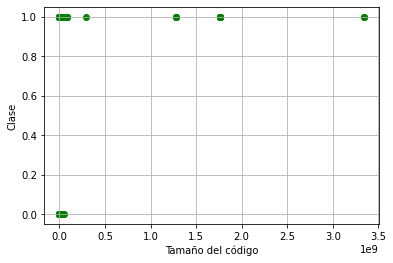

In [2]:
dataset = pd.read_csv('dataset_malwares.csv',sep=',')
dataset = dataset.drop(columns=['Name'])
y = dataset['Malware']
X = dataset.drop(columns=['Malware'])

plt.scatter(X['SizeOfCode'],y,color='green',marker='o',linestyle='solid')
plt.grid()
plt.xlabel('Tamaño del código')
plt.ylabel('Clase')
plt.show()

#### Valores estadísticos

Por otro lado **Seaborn**, es otra biblioteca basada en *matplotlib*, con interfaces y desarrollo de gráficos más atractivos y estadísticamente informativos.

Si Python3 es el interprete por defecto:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "green">pip install seaborn</font><br>
</div>
Si Python3 no es el interprete por defecto:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "green">pip3 install seaborn</font><br>
</div>

In [3]:
dataset = pd.read_csv('dataset_malwares.csv',sep=',')
dataset = dataset.drop(columns=['Name'])
y = dataset['Malware']
X = dataset.drop(columns=['Malware'])

Se observa un valor mínimo de cero en el tamaño del código. **¿Será eso posible?, ¿Será algo malicioso?** Este artículo lo aborda: [Benign and malware file size normalization ](https://www.researchgate.net/figure/Benign-and-malware-file-size-normalization_tbl2_220283798)
Si se pude reducir el número de valores o segmentarlos se podría observar que gran parte de las muestras oscilan entre los valores 0 y 7680.

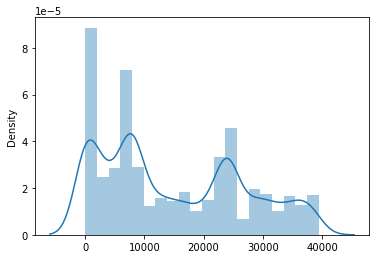

In [4]:
X['SizeOfCode'].values.sort()
sns.distplot(X['SizeOfCode'].values[0:7680]);

### Oblicuidad (Asimetría) y Kurtosis


1. La oblicuidad (asimetría) se usa para obtener probabilidades aproximadas de las distribuciones, es decir que tan simétricas son, el valor representa  desde donde parte el número horizontal de la simetría. 

2. La kurtosis (o apuntamiento) es una medida de forma que mide cuán escarpada o achatada está una curva o distribución.

In [5]:
print("Oblicuidad: %f" % X['SizeOfCode'].skew())
print("Kurtosis: %f" % X['SizeOfCode'].kurt())

Oblicuidad: 46.199654
Kurtosis: 2394.381146


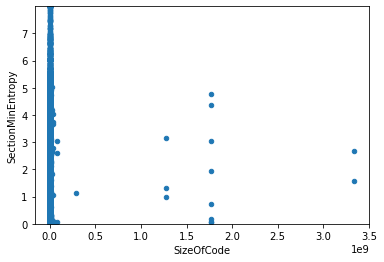

In [6]:
var = 'SectionMinEntropy'
data = pd.concat([X[var],X['SizeOfCode']], axis=1)
data.plot.scatter(x='SizeOfCode', y=var, ylim=(0,max(X[var])));

### Matriz de correlación(Sopa de plasma)

En estadística, una correlación es una medida que expresa el grado en que dos variables están linealmente relacionadas, es decir que tanto pudieran cambiar en un rango constante.

Una matriz de correlación es un cuadrado donde las diferentes características del conjunto de datos se muestras en filas/columnas. Muestra la correlación entre cada muestra y en la línea diagonal la correlación perfecta cuando la característica se compara consigo misma:

1.	Un valor de -1 indica que hay una correlación lineal perfecta de manera negativa entre dos variables
2.	Un valor de 0 indica que no hay una correlación lineal entre variables
3.	Un valor de 1 indica una correlación positiva perfecta entre dos variables

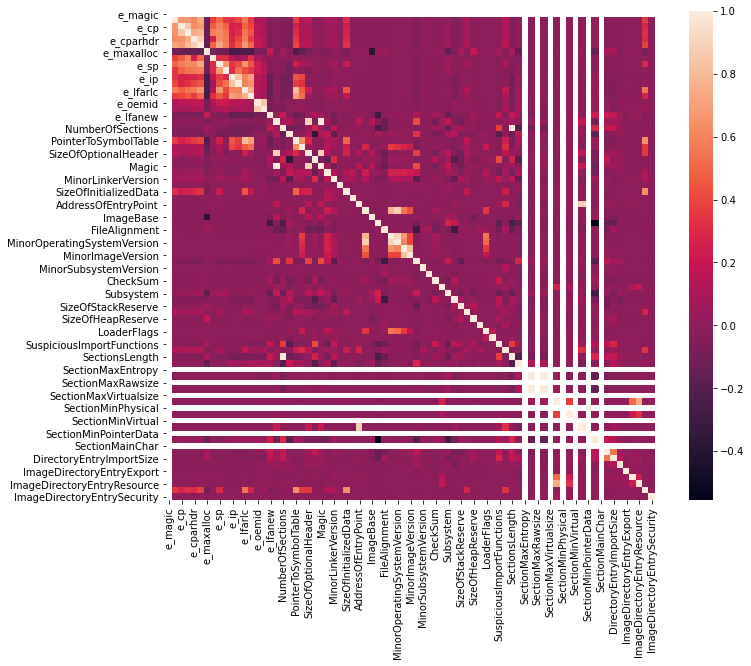

In [7]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.savefig('corr.png',dpi=300)

La matriz anterior se representa mediante un mapa de calor, los colores que tienden patrones más oscuros reflejan correlaciones negativas y los claros correlaciones positivas. Es importante observar que existen bastantes características con correlación positiva con respecto a otras. Por ejemplo, los valores de entropía (*SectionMinEntropy*) tienen correlación positiva con la mayoría de las características, una ligera variación y los valores podrían cambiar radicalmente.

### La bola de cristal

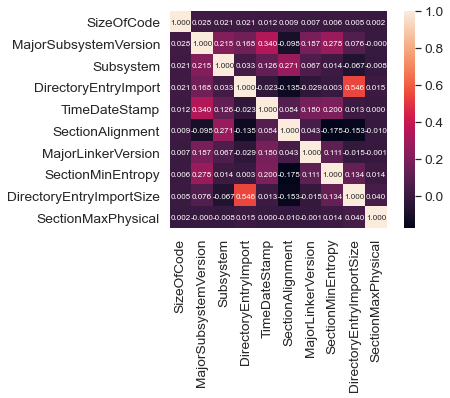

In [8]:
k = 10
cols = corrmat.nlargest(k, 'SizeOfCode')['SizeOfCode'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':8}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('bolacristal.png',dpi=300)
plt.show()

Si se grafican, por ejemplo, solo diez características relacionadas con la caracterñística *SizeOfCode* se puede observar que tiene una correlación nula en comparación con las demás.

Se podría decir que es una característica ideal para trabajar ya que los cambios en los valores de la misma no afectarán el comportamiento de las demás.

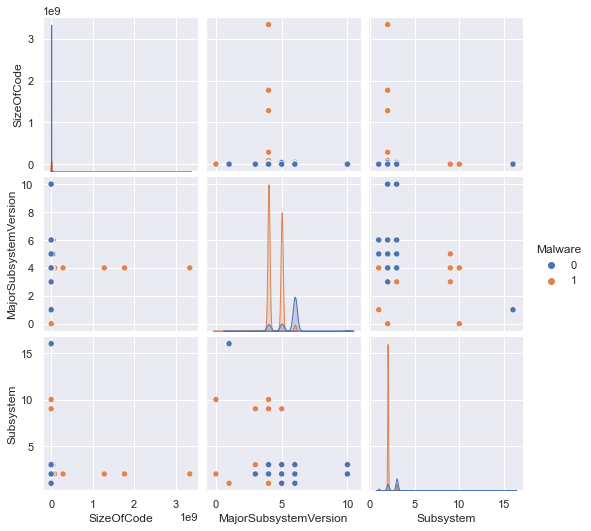

In [9]:
sns.set()
cols = ['SizeOfCode', 'MajorSubsystemVersion','Subsystem','Malware']
sns.pairplot(dataset[cols], size = 2.5,hue='Malware')
plt.show();

El cálculo del sesgo-varianza puede útil para mostrar las tendencias del conjunto de datos.

**¿Pero qué es el sesgo?** Es una de las terminologías más importantes de Ciencia de Datos, la cual describe el fenómeno que ocurre cuando un algoritmo produce resultados perjudiciales que de manera sistemática afectan el proceso de aprendizaje.

### Conjunto de datos de CVE

*Common Vulnerabilities and Exposures* son una lista de brechas de seguridad públicamente demostradas y categorizadas [cve](https://cve.mitre.org/):

Las características del conjunto de datos son:

1.	Índice: el identificador propuesto por CVE para cada vulnerabilidad: CVE-AÑO-NUMERO_DE_LA_VULNERABILIDAD
2.	* mod_date*: fecha de modificación de la vulnerabilidad
3.	*pub_date*: fecha de publicación de la vulnerabilidad
4.	*cvss* (Common Vulnerability Scoring System): es un sistema de puntaje para caracterizar la severidad de una vulneabilidad en el rango de $\{0,10\}$, en orden ascendente de impacto de la vulnerabilidad [CVSS](https://nvd.nist.gov/vuln-metrics/cvss/v3-calculator)
5.	*cwe_code*  (Common Weakness Enumeration): es el código asociado a una taxonomía de debilidades de seguridad ya identificadas por el MITRE [CWE](https://cwe.mitre.org/)
6.	*cwe_name*: es el nombre asociado a una taxonomía de debilidades de seguridad ya identificadas por el MITRE
7.	*summary*: resumen de la vulnerabilidad

In [21]:
dataset_cve = pd.read_csv('cve.csv')
dataset_cve.head()

Unnamed: 0        mod_date        pub_date  cvss  cwe_code  \
0  CVE-2019-16548  21/11/19 15:15  21/11/19 15:15   6.8       352   
1  CVE-2019-16547  21/11/19 15:15  21/11/19 15:15   4.0       732   
2  CVE-2019-16546  21/11/19 15:15  21/11/19 15:15   4.3       639   
3   CVE-2013-2092  20/11/19 21:22  20/11/19 21:15   4.3        79   
4   CVE-2013-2091  20/11/19 20:15  20/11/19 20:15   7.5        89   

                                            cwe_name  \
0                  Cross-Site Request Forgery (CSRF)   
1   Incorrect Permission Assignment for Critical ...   
2   Authorization Bypass Through User-Controlled Key   
3   Improper Neutralization of Input During Web P...   
4   Improper Neutralization of Special Elements u...   

                                             summary  
0  A cross-site request forgery vulnerability in ...  
1  Missing permission checks in various API endpo...  
2  Jenkins Google Compute Engine Plugin 4.1.1 and...  
3  Cross-site Scripting (XSS) in Dolibarr ERP/CRM...  
4  SQL injection vulnerability in Dolibarr ERP/CR...

In [22]:
dataset_cve.describe()

cvss      cwe_code
count  89660.000000  89660.000000
mean       6.021429    199.690854
std        1.994757    176.177244
min        0.000000      1.000000
25%        4.300000     79.000000
50%        5.800000    119.000000
75%        7.500000    284.000000
max       10.000000   1188.000000

In [17]:
dataset_cve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  89660 non-null  object 
 1   pub         89660 non-null  object 
 2   pub_date    89660 non-null  object 
 3   cvss        89660 non-null  float64
 4   cwe_code    89660 non-null  int64  
 5   cwe_name    89660 non-null  object 
 6   summary     89660 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.8+ MB


In [23]:
dataset_cve_cvss = dataset_cve[['Unnamed: 0', 'mod_date','pub_date','cvss','cwe_name']]
dataset_cve_cvss.head().style.highlight_max(color='red')

In [32]:
fechas_anio = [datetime.datetime.strptime(fecha, '%d/%m/%y %H:%M').year for fecha in dataset_cve_cvss["pub_date"].values]

In [33]:
fechas_df = pd.DataFrame(fechas_anio,columns=['anio'])

In [34]:
fechas_df.groupby('anio').anio.count()

anio
1999       46
2000       18
2001       34
2002      217
2003      245
2004      147
2005      356
2006      864
2007     2435
2008     4991
2009     4909
2010     3755
2011     3396
2012     4135
2013     4125
2014     6825
2015     5217
2016     5325
2017    12965
2018    14855
2019    14800
Name: anio, dtype: int64

In [35]:
anios = fechas_df.groupby('anio').anio.count().keys()
frecuencia = fechas_df.groupby('anio').anio.count().tolist()

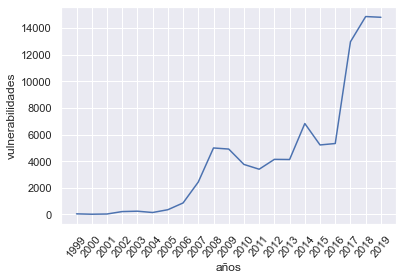

In [36]:
figura = sns.lineplot(anios,frecuencia,x="años",y="vulnerabiliades");
figura.set(xlabel='años', ylabel='vulnerabilidades')
figura.set_xticklabels(anios,rotation=50)
plt.xticks(anios)
plt.show()

[Text(0.5, 0, 'Puntaje CVSS'), Text(0, 0.5, 'vulnerabilidades')]

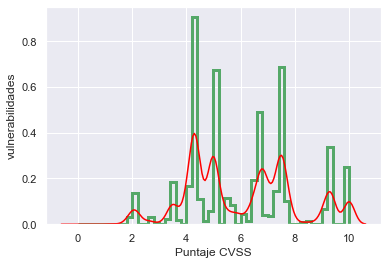

In [40]:
figura = sns.distplot(dataset_cve_cvss['cvss'],color="red",
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"});
figura.set(xlabel='Puntaje CVSS', ylabel='vulnerabilidades')

In [41]:
vulnerabilidades_df = pd.concat([dataset_cve_cvss['cwe_name'],fechas_df['anio']],axis=1)

In [42]:
vulnerabilidades_df.groupby(['cwe_name','anio']).anio.count()

cwe_name                                    anio
 7PK - Code Quality                         2018     1
 7PK - Errors                               2006     1
                                            2016     9
                                            2017    10
                                            2018    22
                                                    ..
 XML Injection (aka Blind XPath Injection)  2013     1
                                            2016     1
                                            2017     7
                                            2018     8
                                            2019    14
Name: anio, Length: 916, dtype: int64